Motivation
------------
As outlined in Satoshi's whitepaper [Bitcoin: A Peer-to-Peer Electronic Cash System], a network of timestamp servers secures the Bitcoin blockchain by calculating a hash for each block header. A healthy Biticoin "mining" sector is necessary for the future of Bitcoin and cryptocurrencies which use "proof of work" to safeguard distributed ledgers against double spending. 

The objective of this analysis is to construct a Bitcoin mining profitability model which can help prospective or exisiting Bitcoin miners plan capacity. By removing some of the uncertainty from miners' investment decisions, we hope to lower risk of investment, encourage comptetition and drive Bitcoin mining towards becoming a reliable and reputable utility underpinning a healthy cryptocurrency ecosystem. 

The Bitcoin Mining Profit Function
---------------------------------------

We start by constructing a profit function for a single miner:

$$ Profit = Revenues - OpEx - CapEx$$

### Revenues

Revenues are proportional to share of mining network. Let's call the initial network hashrate $h_{0}$ and the additional planned capacity $X$, both measured in Petahash. Then revenues generated by the added capacity are

$$ Revenues =  \frac{X}{h_{0}+X} \times B \times (S + F) \times UTZ $$

where $B$ is Bitcoin price in $\$/BTC$, $S$ is the new supply and $F$ are the transfer fees over any given period. UTZ is a dimensionless factor less than one representing capacity utilization.

For simplicity we assume $h_{0}$ changes slowly while capacity $X$ is being added, $h_{0}$ is effectively static. In reality, $h_{0}$ may change, new miners may enter while $X$ is being deployed, existing miners may also shut scale back as new capacity erodes their margins. 

### Operating expenes

Operating expenes are proportional to the added capacity $X$:

$$ OpEx = C \times X $$

The factor $C$ has units of $\$/Petahash$ and depends on mining system power consumption $POW$, the co-location Power Usage Efficiency $PUE$ and the co-location price $CLC$:

$$ C = CLC \times PUE \times POW $$

Here $CLC$ is measured in $\$/W$, $PUE$ is a dimensionless factor greater than one, and $POW$ is the system efficiency in W/Petahash. 

### Capital expenses

Capital expenses are amortised over time $T$ and have a variable component $X/z$ which scales with capacity deployed and a fixed component, $NRE$:

$$ CapEx = \frac{1}{T}\times\left(\frac{X}{z} + NRE \right) $$

Here $1/z$ is the capital cost of additional capacity, measured in \$/Petahash, and $NRE$ denotes the fixed cost of system developement in \$, often referred to as Non-Recurring Engineering costs.

### The profit function

Putting together the terms for revenues, opex and capex, we construct a Bitcoin profit function:

$$\pi(X) = \frac{X}{h_{0}+X} \times B \times (S + F) - X \times C - \frac{1}{T}\times\left(\frac{X}{z} + NRE \right) $$

A plot of the terms of the profit function shows how incremental revenue declines with with added capacity, the revenue function is concave in $X$. Capital costs and operational costs, however, are linear in $X$. Mining is profitable when revenues exceed costs, the shaded area marks the profitable range for $X$. (For convenience, we set $UTZ = 1$ but introduce it later in the reference calculation.)

Profit function

Because revenues are concave and costs linear, the profit function can have two break even points, $h_{BE}^{Lower}$ and $h_{BE}^{Upper}$. Between the breakeven points lies the point of maximum profitabilty $h_{*}$. If too much capacity is added incremental revenues ultimately become lower than incremental operating expenditure, this occurs at the maximum hashrate $h_{CAP}$.

#### Maximum hashrate

$$ h_{CAP} = \frac{ B (S + F) }{C} $$
 
#### Hashrate of maximum profitability

$$ h^{*} = \sqrt{\frac{h_{0} B (S + F)}{C+\frac{1}{zT}}} $$

#### Breakeven hashrates 

 $$ h_{BE}^{Upper/Lower} = h_{0} + \frac{B(S+F) - h_{0} ( C +\frac{1}{zT}) - \frac{NRE}{T}}{2(C +\frac{1}{zT})} \pm \frac{\sqrt{( B(S+F) - h_{0} ( C +\frac{1}{zT}) - \frac{NRE}{T} )^2 - 4(C +\frac{1}{zT}) h_{0} \frac{NRE}{T} }}{2(C +\frac{1}{zT})} $$
 
#### Shortest payback
 
The root of $$B(S+F) - h_{0} ( C +\frac{1}{zT}) - \frac{NRE}{T} )^2 - 4(C +\frac{1}{zT}) h_{0} \frac{NRE}{T} =0$$ which represents the larger value of $T$ is the shortest possible payback period, $T_{Implied}$.

[Bitcoin: A Peer-to-Peer Electronic Cash System]: https://bitcoin.org/bitcoin.pdf

Calculating profitability
-------------------------

Consider a reference implementation with numbers which approximate the current state of the art for Bitcoin mining ASICs and datacenter deployment:

CLC | NRE | INV  | POW | PUE |UTZ 
--- | --- | --- | --- | --- | ---
 50 \$/kW/mo | \$8M | \$0.5M/Ph | 0.1MW/Ph | 1.03 | 0.99999 
 
Using market data, and selecting an amortization period, we can calculate the breakeven points of the profit function, as well as $h_{*}$ and $h_{CAP}$. For our reference calculatoin, we chose the following numbers:
 
 B | S | F  | $h_{0}$ | T 
--- | --- | --- | --- | --- 
\$250 | 1,312,500 | 3,650 | 400 | 3


The profit function for the reference case is plotted below:

Profit function

The following Python code calculates $h_{CAP}$, $h_{*}$, $h_{BE}^{Upper/Lower}$ and $T_{Implied}$. 

In [26]:
# %load miningReferenceCalc.py
from math import sqrt
import numpy as np

## REVENUES:
# B: BTC price ($)
# S: Annual supply
# F: Annual fees
# X: Added capacity (PHa)
# H0: Initial hashrate (PHa)
# UTZ: Capacity Utilization (<1) 

## OPERATING EXPENSES:
# C: OpCost Factor : f(CLC,PUE,POW)
# CLC: Cost of Land and Construction ($/W)
# PUE: Power Usage Effectiveness (dimensionless)
# POW: Power Efficiency (W/PH)

## CAPITAL EXPENSES:
# T: Amortization Time (years)
# 1/z: Capital Cost of additional capacity ($/PH)
# NRE: Fixed cost of system development (Non-Recurring Engineering) ($)

# 1 PH = 1e3 TH = 1e6 GH = 1e9 MH = 1e12 kH

# Reference data for the BTC mining industry:
refTechData = [0,  # CLC ($/kW/m)
               10_000/(1000*200),           # INV ($/PHa)
               (3*3030/(60*60))/((3*141)*1000),           # POW (W/PHa/s)
               1.00,                # PUE (dimensionless)
               0.95,                # UTZ (dimensionless)
               0]                   # NRE ($M) 8.0* 1e6

# Block Reward:
block_reward = 3.125 # [BTC] (04/2024-XX/2028)

refMktData = [54_719.98,    # BTC Price ($)
              block_reward*(365.25*24*6),      # Annual Supply (BTC)
              10*365.25,             # Annual Fees ($)
              (3*141)/1000,          # Initial Hashrate (PHa)
              3                      # Amortization (years)
              ]

def calcHashrates(refTechData, refMktData) : 
    """ Calculates hCAP, hSTAR, hBE_U/L, T """
    clc, inv, poww, pue, utz, nre = refTechData[:]
    btc, sup, fee, h0, amz = refMktData[:]
    hCAP = btc * utz * (sup + fee) / (clc * poww * pue )
    hSTAR = sqrt( h0 * btc * utz * (sup + fee) / ( (clc * poww * pue ) + inv/amz) )
    c = clc * poww * pue  
    aa = c + inv / amz
    bb = - ( btc * utz * (sup + fee) - h0 * c - inv/amz * h0 - nre/amz) 
    cc = h0 * nre / amz
    if (bb*bb - 4 * aa * cc) >= 0 :
        hBE_plus = h0 +  ( - bb + sqrt(bb*bb - 4 * aa * cc) ) * 0.5 / aa
        hBE_minus = h0 + ( - bb - sqrt(bb*bb - 4 * aa * cc) ) * 0.5 / aa
        if (hBE_plus <= h0):
            hBE_plus = float('NaN')
        if (hBE_minus <= h0):
            hBE_minus = float('NaN')
        return hCAP, hSTAR, hBE_plus, hBE_minus
    else: 
        return hCAP, hSTAR, float('NaN'), float('NaN')

def calcImpliedT(refTechData, refMktData):
    """ Calculates implied T """
    clc, inv, poww, pue, utz, nre = refTechData[:]
    btc, sup, fee, h0, amz = refMktData[:]
    c = clc * poww * pue 

    aa = (h0 * inv + nre)**2 - 4 * h0 * nre * inv
    bb = - ( 2.0 * (btc * utz * (sup + fee) - h0 * c) * (h0 * inv + nre) + 4.0 * h0 * c * nre)
    cc = ( btc * utz * (sup + fee)  - h0 * c)**2

    # using numpy
    # coeff = [1.0, bb / aa, cc / aa]
    # rootT1, rootT2 = np.roots(coeff)
    # return 1.0/rootT1, return 1.0/rootT2
    
    if (bb*bb - 4 * aa * cc) >= 0 :
        # T_plus =  ( - bb + sqrt(bb*bb - 4 * aa * cc) ) * 0.5 / aa
        T_minus = ( - bb - sqrt(bb*bb - 4 * aa * cc) ) * 0.5 / aa
        return 1.0/T_minus
    else: 
        return float('NaN')

hCAP, hSTAR, hBE_upper, hBE_lower = calcHashrates(refTechData, refMktData) 
impliedT = calcImpliedT(refTechData, refMktData)

print(hCAP, hBE_upper, hSTAR, hBE_lower)
print(f"The shortest payback period is: {impliedT} years.")

ZeroDivisionError: float division by zero

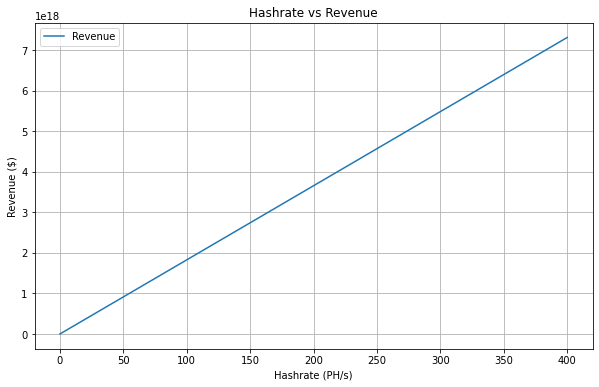

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_revenue(hashrate, refTechData, refMktData):
    """ Calculates revenue based on hashrate """
    btc, sup, fee = refMktData[0], refMktData[1], refMktData[2]
    clc, poww, pue, utz = refTechData[0], refTechData[2], refTechData[3], refTechData[4]
    return btc * utz * (sup + fee) * hashrate / (clc * poww * pue)

# Generate a range of hashrates
hashrates = np.linspace(0, 400, 1000)  # Adjust the range accordingly

# Calculate revenues for each hashrate
revenues = [calculate_revenue(h, refTechData, refMktData) for h in hashrates]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hashrates, revenues, label='Revenue')
plt.xlabel('Hashrate (PH/s)')
plt.ylabel('Revenue ($)')
plt.title('Hashrate vs Revenue')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import requests
import pandas as pd

def fetch_historical_data():
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {
        "vs_currency": "usd",
        "days": "365",
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # Correct the keys according to the API response
    prices = data["prices"]
    market_caps = data["market_caps"]
    total_volumes = data["total_volumes"]

    # Store the data in a dataframe
    df = pd.DataFrame({
        "Price": prices,
        "Market Cap": market_caps,
        "Total Volume": total_volumes
    })
    
    return df

df = fetch_historical_data()

In [ ]:
print(df.head())

                                 Price                           Market Cap  \
0   [1677542400000, 23518.12390627588]    [1677542400000, 454364917718.867]   
1  [1677628800000, 23155.543746825795]  [1677628800000, 446010055987.85736]   
2  [1677715200000, 23634.333489123786]   [1677715200000, 456417315966.7193]   
3   [1677801600000, 23464.33654185282]   [1677801600000, 453067155320.8529]   
4   [1677888000000, 22367.43302246967]   [1677888000000, 431727585101.1504]   

                          Total Volume  
0  [1677542400000, 28832423816.478718]  
1   [1677628800000, 25534054046.06684]  
2  [1677715200000, 32507897259.084335]  
3  [1677801600000, 27432755758.440197]  
4  [1677888000000, 34239649135.070206]  


In [ ]:
import pandas as pd
import requests
import pandas as pd

def fetch_historical_data():
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {
        "vs_currency": "usd",
        "days": "365",
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # Correct the keys according to the API response
    prices = data["prices"]
    market_caps = data["market_caps"]
    total_volumes = data["total_volumes"]
    
    # Store the data in a dataframe
    df = pd.DataFrame({
        "Price": prices,
        "Market Cap": market_caps,
        "Total Volume": total_volumes
    })
    
    return df

df = fetch_historical_data()
